In [8]:
import numpy as np
%run Dolphins_data.ipynb
import sys
sys.path.append('../') # Change path
from Functions import * # Import Gradient_function

In [9]:
mu = np.zeros(2) # Define mean (mu) as a zero vector
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]]) # Define covariance matrix
num_samples = 62  # Number of samples you want to generate

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

In [10]:
n = 50 # Number of iterations
graf = np.zeros(n)
for k in range(n):
    for i in range(1,num_samples+1): # Run over number of num_samples
        for j in range(2): # Run over dimension
            points[i][j] += 0.1*Gradient_function(i,j,Y,points) # Use Gradient_function and take step=0.1*grad
            
    graf[k] = Loss_function(points,Y) # Calcualte the probability using Loss_function

Text(0.5, 0, 'Iterration')

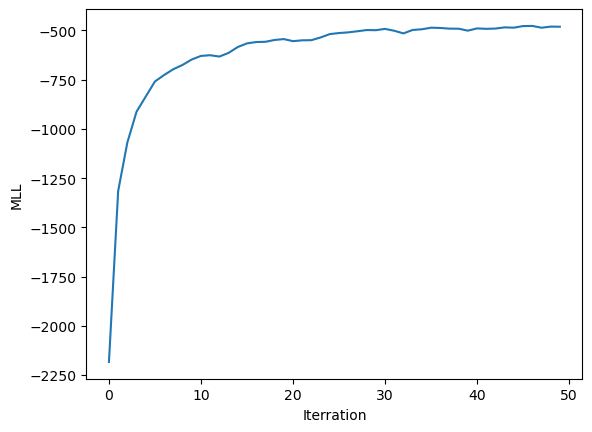

In [11]:
plt.plot(graf)
plt.ylabel('MLL')
plt.xlabel('Iterration')

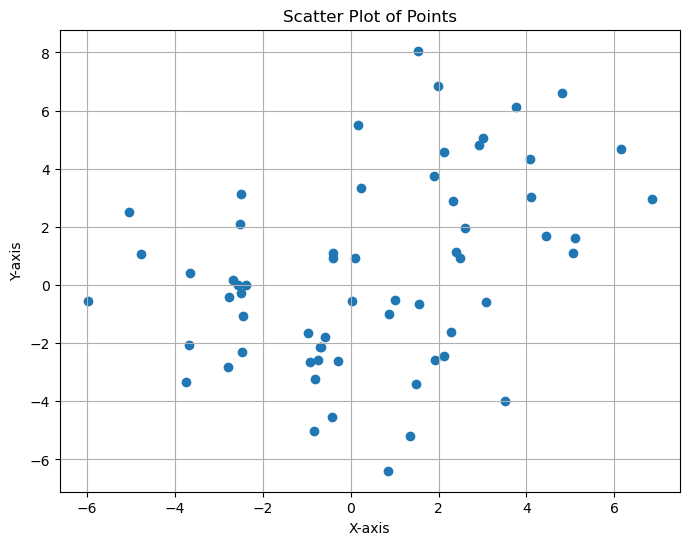

In [12]:
# extract the points and plot them
x = [points[i+1][0] for i in range(num_samples)]
y = [points[i+1][1] for i in range(num_samples)]

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')
plt.grid(True)
plt.show()

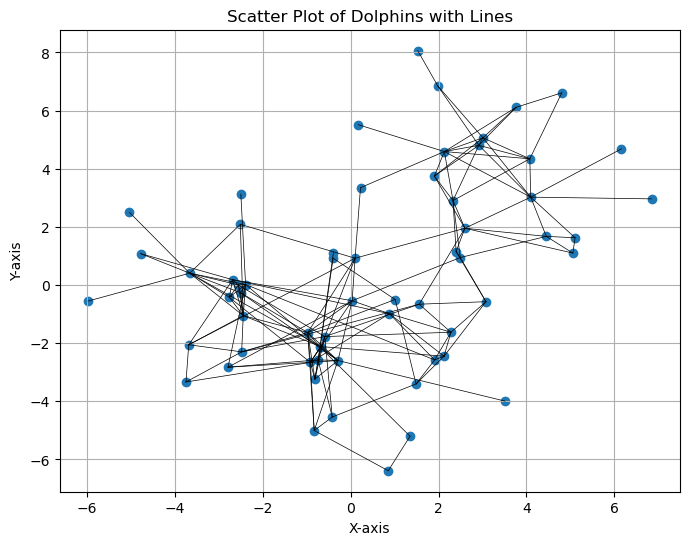

In [20]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points[Y[m][1]]
        point2 = points[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.5) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points.values()]
y = [point[1] for point in points.values()]
plt.scatter(x, y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Dolphins with Lines')
plt.grid(True)
plt.show()